# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

## Iris Flower dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris




'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")

In [2]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [3]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# (3.2) 2-D Scatter Plot

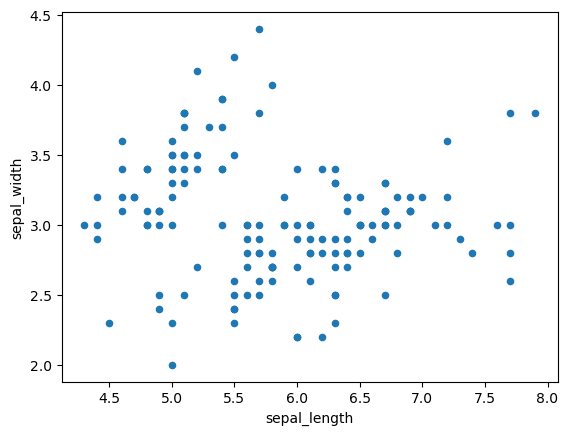

In [5]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

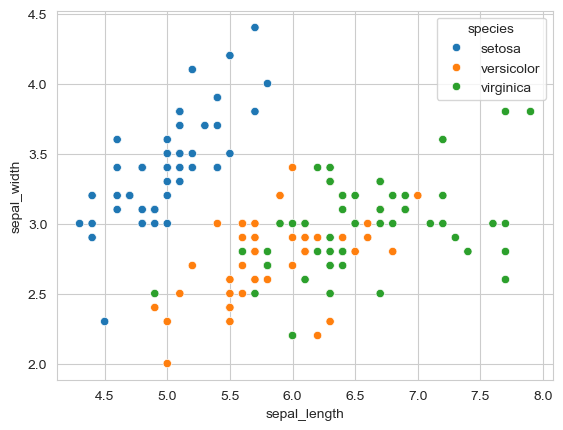

In [6]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 


# Set the overall visual style of the plots
sns.set_style("whitegrid")        # Adds a clean white background with grid lines

# Create a 2D scatter plot
sns.scatterplot(
    data=iris,                    # The dataset to use
    x="sepal_length",             # Column on the X-axis
    y="sepal_width",              # Column on the Y-axis
    hue="species"                 # Color-code points based on flower species
)

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

C:\Users\Lenovo\anaconda3\envs\stable_py\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


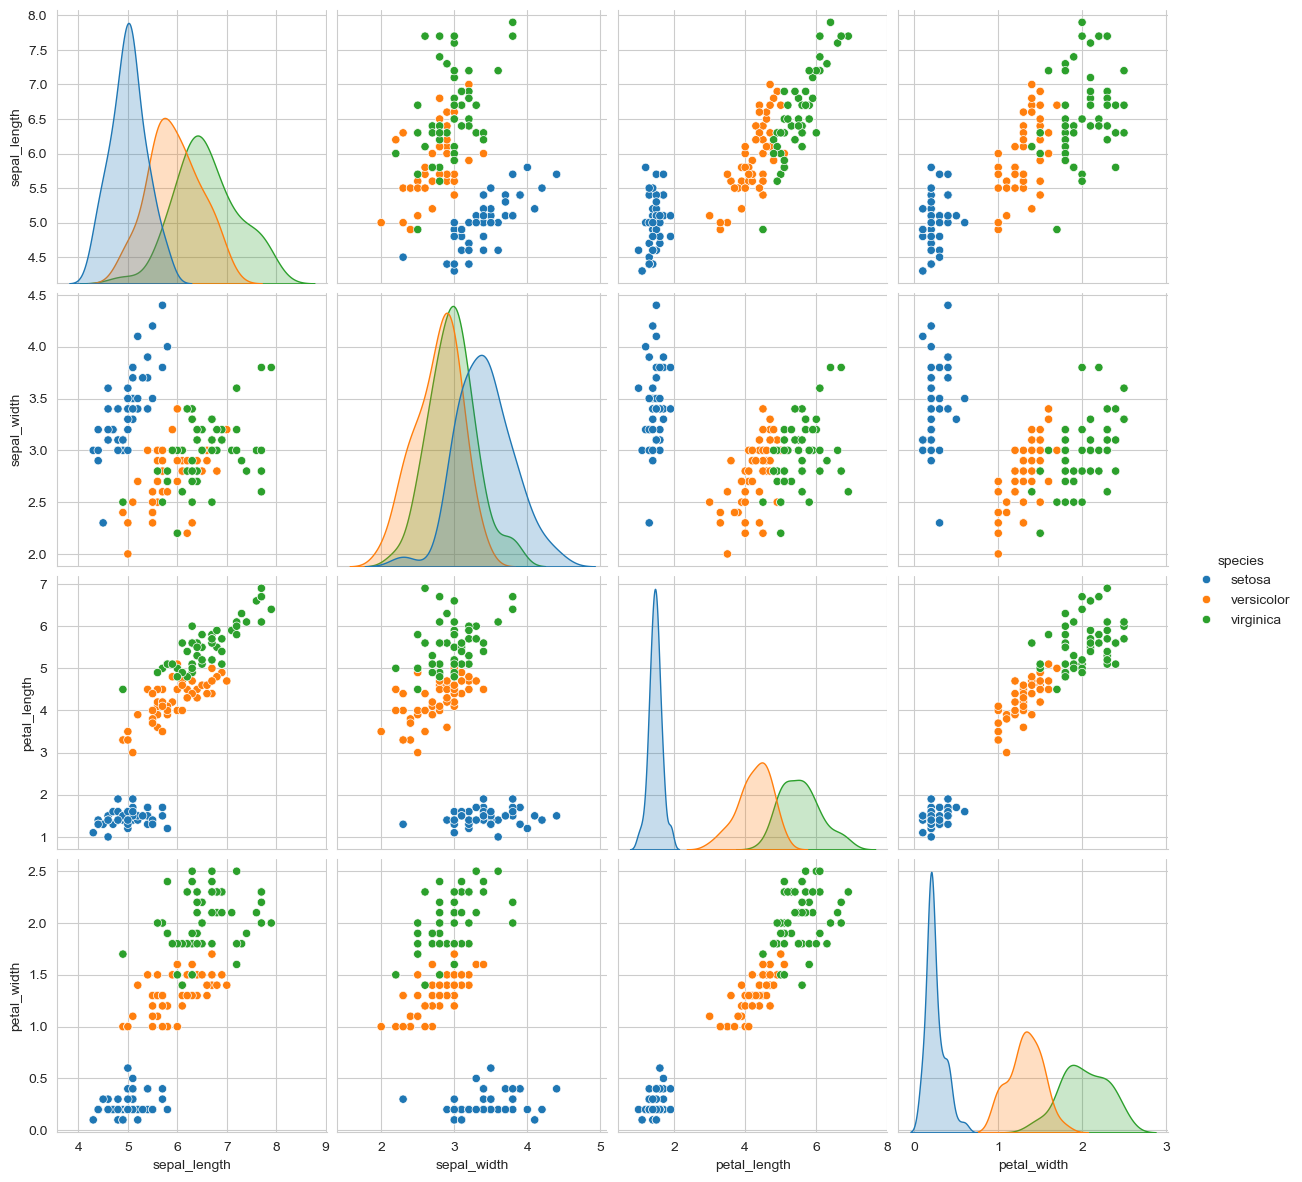

In [7]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

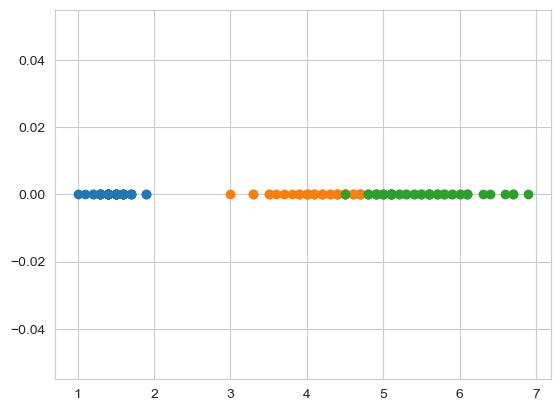

In [8]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];# Select only rows where species = 'setosa'
iris_virginica = iris.loc[iris["species"] == "virginica"];# Select only rows where species = 'verginica'
iris_versicolor = iris.loc[iris["species"] == "versicolor"];# Select only rows where species = 'versicolor'
#print(iris_setosa["petal_length"])

# ----------- 1-D SCATTER PLOT STARTS HERE -----------

# Plot Setosa petal lengths
# X-axis → petal_length values
# Y-axis → np.zeros_like(...) puts all points on a single line (y = 0)
# 'o' → draws circular markers for each data point
# label → used for legend
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

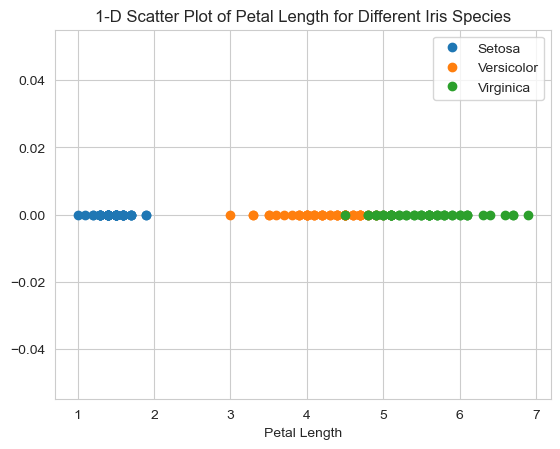

In [9]:
# Import necessary libraries
import numpy as np                  # Used for numerical operations like creating arrays
import seaborn as sns               # Used to load the iris dataset easily
import matplotlib.pyplot as plt     # Used for plotting graphs

# Load the iris dataset (built into seaborn)
iris = sns.load_dataset("iris")     # Returns a pandas DataFrame with 150 samples and 5 columns

# Filter data for each flower species
iris_setosa = iris.loc[iris["species"] == "setosa"]         # Select only rows where species = 'setosa'
iris_versicolor = iris.loc[iris["species"] == "versicolor"] # Select only rows where species = 'versicolor'
iris_virginica = iris.loc[iris["species"] == "virginica"]   # Select only rows where species = 'virginica'

# ----------- 1-D SCATTER PLOT STARTS HERE -----------

# Plot Setosa petal lengths
# X-axis → petal_length values
# Y-axis → np.zeros_like(...) puts all points on a single line (y = 0)
# 'o' → draws circular markers for each data point
# label → used for legend
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa["petal_length"]), 'o', label="Setosa")

# Plot Versicolor petal lengths in the same way
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor["petal_length"]), 'o', label="Versicolor")

# Plot Virginica petal lengths in the same way
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica["petal_length"]), 'o', label="Virginica")

# Add x-axis label for clarity
plt.xlabel("Petal Length")          # Label for the X-axis (the feature being visualized)

# Add a title to describe what the plot shows
plt.title("1-D Scatter Plot of Petal Length for Different Iris Species")

# Add a legend to differentiate species by color/marker
plt.legend()

# Display the final plot
plt.show()

# ----------- NOTES / INSIGHTS -----------
# ❌ Disadvantage: Points overlap heavily, making it hard to see data density.
# ✅ Better 1-D visualization options:
#   - sns.stripplot(x="species", y="petal_length", data=iris)
#   - sns.swarmplot(x="species", y="petal_length", data=iris)
#   - sns.boxplot(x="species", y="petal_length", data=iris)
#   - sns.violinplot(x="species", y="petal_length", data=iris)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2852\3411423098.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


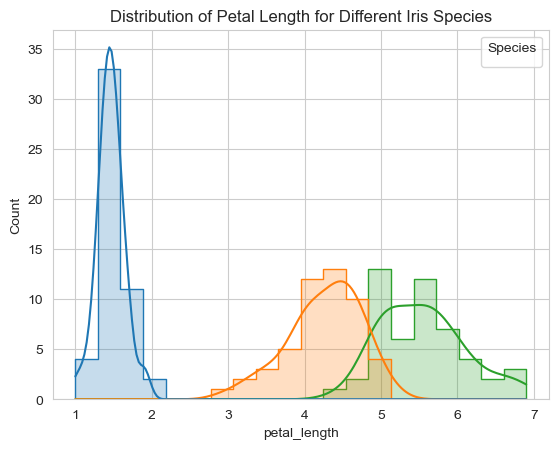

In [10]:
# Set the overall visual style
sns.set_style("whitegrid")          # Adds a white background with grid lines for better readability

# Create a distribution (histogram + KDE) plot of petal_length
sns.histplot(
    data=iris,                      # Dataset to use
    x="petal_length",               # Feature to plot on the x-axis
    hue="species",                  # Color-code the distribution by species
    kde=True,                       # Adds a smooth density curve on top of the histogram
    element="step",                 # Draws outline-style histogram bars (optional aesthetic)
    bins=20                         # Number of bins for the histogram
)

# Add a title for clarity
plt.title("Distribution of Petal Length for Different Iris Species")

# Show the legend that identifies which color belongs to which species
plt.legend(title="Species")

# Display the final plot
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2852\1181216887.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


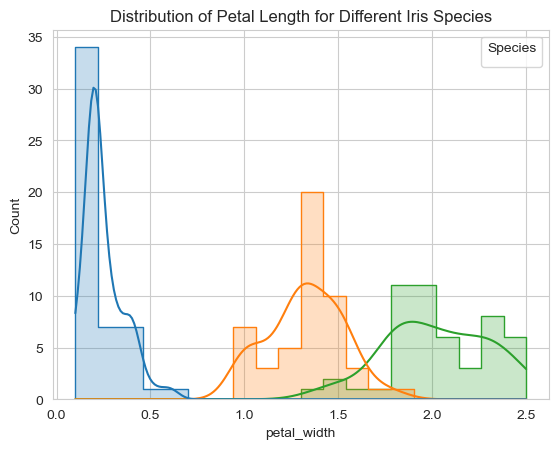

In [11]:
# Set the overall visual style
sns.set_style("whitegrid")          # Adds a white background with grid lines for better readability

# Create a distribution (histogram + KDE) plot of petal_length
sns.histplot(
    data=iris,                      # Dataset to use
    x="petal_width",               # Feature to plot on the x-axis
    hue="species",                  # Color-code the distribution by species
    kde=True,                       # Adds a smooth density curve on top of the histogram
    element="step",                 # Draws outline-style histogram bars (optional aesthetic)
    bins=20                         # Number of bins for the histogram
)

# Add a title for clarity
plt.title("Distribution of Petal Length for Different Iris Species")

# Show the legend that identifies which color belongs to which species
plt.legend(title="Species")

# Display the final plot
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2852\3165914521.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


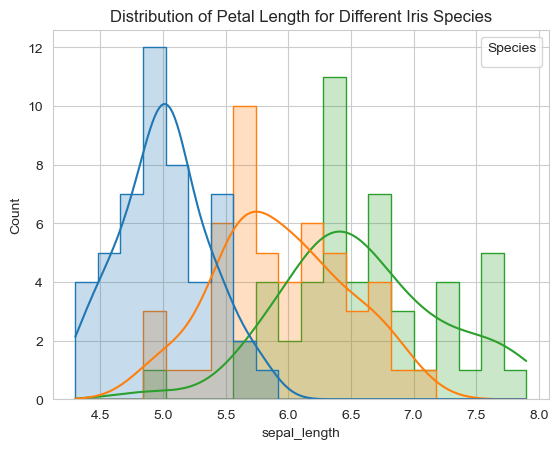

In [12]:
# Set the overall visual style
sns.set_style("whitegrid")          # Adds a white background with grid lines for better readability

# Create a distribution (histogram + KDE) plot of petal_length
sns.histplot(
    data=iris,                      # Dataset to use
    x="sepal_length",               # Feature to plot on the x-axis
    hue="species",                  # Color-code the distribution by species
    kde=True,                       # Adds a smooth density curve on top of the histogram
    element="step",                 # Draws outline-style histogram bars (optional aesthetic)
    bins=20                         # Number of bins for the histogram
)

# Add a title for clarity
plt.title("Distribution of Petal Length for Different Iris Species")

# Show the legend that identifies which color belongs to which species
plt.legend(title="Species")

# Display the final plot
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2852\12550228.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


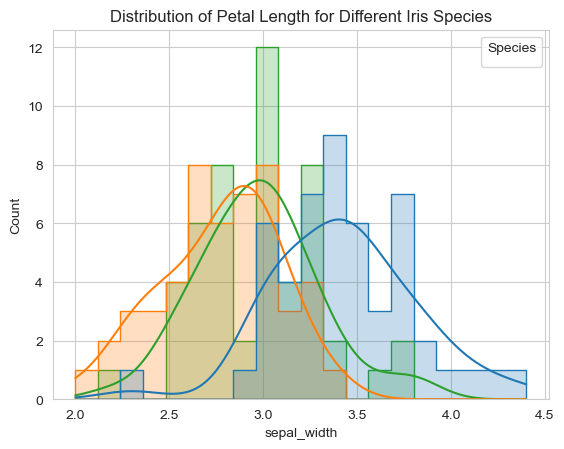

In [13]:
# Set the overall visual style
sns.set_style("whitegrid")          # Adds a white background with grid lines for better readability

# Create a distribution (histogram + KDE) plot of petal_length
sns.histplot(
    data=iris,                      # Dataset to use
    x="sepal_width",               # Feature to plot on the x-axis
    hue="species",                  # Color-code the distribution by species
    kde=True,                       # Adds a smooth density curve on top of the histogram
    element="step",                 # Draws outline-style histogram bars (optional aesthetic)
    bins=20                         # Number of bins for the histogram
)

# Add a title for clarity
plt.title("Distribution of Petal Length for Different Iris Species")

# Show the legend that identifies which color belongs to which species
plt.legend(title="Species")

# Display the final plot
plt.show()

In [14]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


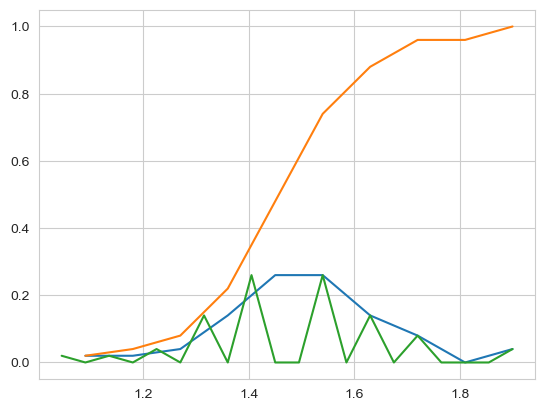

In [15]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

# Plot CDF of petal_length

# Compute histogram of petal_length for setosa species
# np.histogram divides data into 'bins' (10 intervals here)
# density=True normalizes so that the total area under histogram = 1
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)

# Calculate PDF (Probability Density Function)
# Divide each bin count by total count sum to get probability per bin
pdf = counts/(sum(counts))

# Print the calculated PDF values (probabilities for each bin)
print(pdf);

# Print the edges (boundaries) of each bin interval
print(bin_edges);

# Calculate CDF (Cumulative Distribution Function)
# np.cumsum adds up PDF values cumulatively — each value shows
# total probability up to that bin
cdf = np.cumsum(pdf)

# Plot the PDF values against bin edges
# bin_edges[1:] means skip the first leftmost edge (since bins are 1 less than edges)
plt.plot(bin_edges[1:],pdf);

# Plot the CDF values against bin edges to show cumulative probabilities
plt.plot(bin_edges[1:], cdf)


# Compute histogram again with finer bins (20 bins instead of 10)
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)

# Calculate new PDF for 20 bins
pdf = counts/(sum(counts))

# Plot this finer PDF for comparison
plt.plot(bin_edges[1:],pdf);

# Display the final combined plot
plt.show();


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


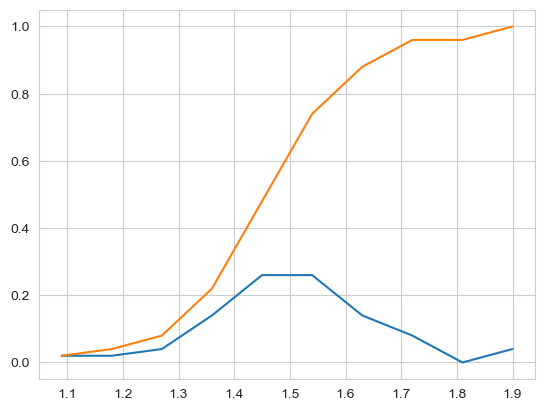

In [16]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

# Plot CDF of petal_length

# Compute histogram for petal_length values of iris_setosa
# np.histogram divides the data into 10 bins (intervals)
# density=True normalizes it so total area under histogram = 1
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)

# Calculate the Probability Density Function (PDF)
# Each bin's probability = count / total count sum
pdf = counts/(sum(counts))

# Print PDF values (probabilities of each bin)
print(pdf);

# Print bin edges (interval boundaries for petal_length)
print(bin_edges)

# Compute Cumulative Distribution Function (CDF)
# np.cumsum adds up the PDF values cumulatively to get total probability up to each bin
cdf = np.cumsum(pdf)

# Plot the PDF (Probability Density Function)
# Shows how petal_length values are distributed
plt.plot(bin_edges[1:],pdf)

# Plot the CDF (Cumulative Distribution Function)
# Shows cumulative probability — how much fraction of data ≤ a given petal_length
plt.plot(bin_edges[1:], cdf)

# Display the final plot on the screen
plt.show();


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


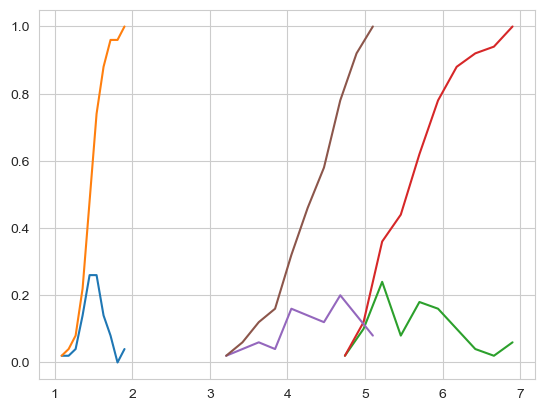

In [17]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [18]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.4620000000000002
2.4137254901960787
5.5520000000000005
4.26

Std-dev:
0.17191858538273286
0.5463478745268441
0.4651881339845204


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [19]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# (3.7) Box plot and Whiskers

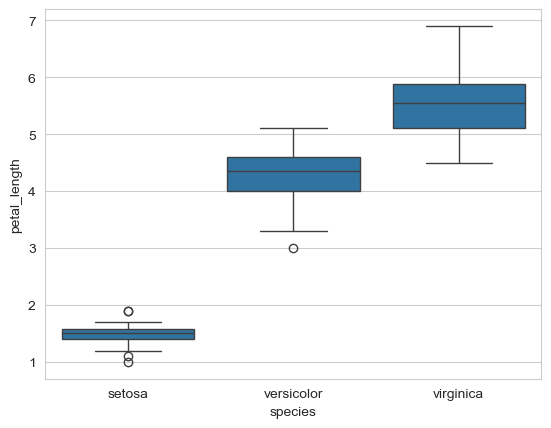

In [20]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2852\2469325526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=iris, palette='Set1')


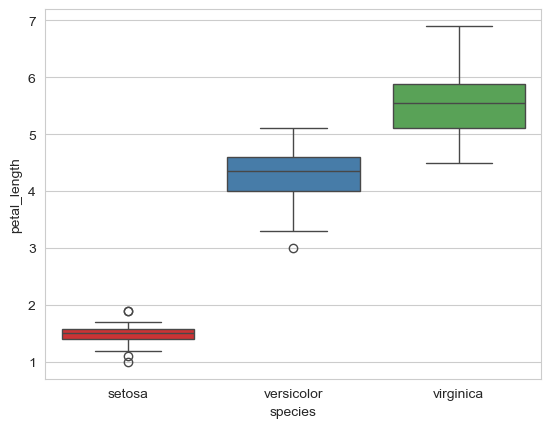

In [21]:
# Create a colorful boxplot for petal_length vs species
sns.boxplot(x='species', y='petal_length', data=iris, palette='Set1')  
# You can try other palettes like 'Set1', 'coolwarm', 'husl', 'pastel', etc.

# Display the boxplot
plt.show()


# (3.8) Violin plots

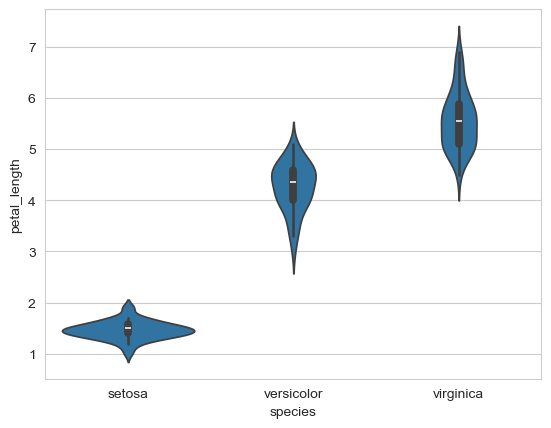

In [22]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2852\1472544892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="species", y="petal_length", data=iris, palette="Set2")


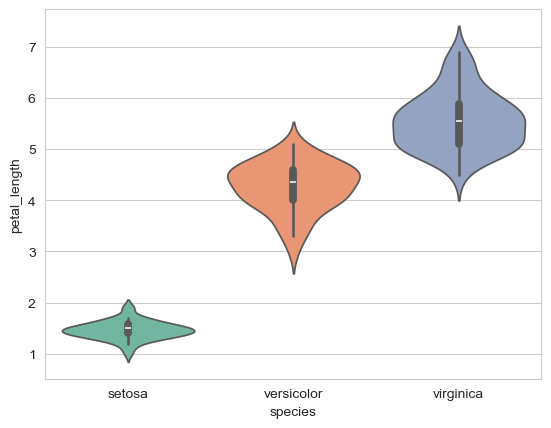

In [23]:
# Create violin plot with color for each species
sns.violinplot(x="species", y="petal_length", data=iris, palette="Set2")

# Show the plot
plt.show()


#| Type of Analysis | No. of Variables | Purpose                         | Example Plot            |
#| ---------------- | ---------------- | ------------------------------- | ----------------------- |
#| **Univariate**   | 1                | Distribution                    | Histogram, Boxplot      |
#| **Bivariate**    | 2                | Relationship                    | Scatter Plot, Line Plot |
#| **Multivariate** | 3+               | Pattern among multiple features | Pair Plot, Heatmap      |


#<h2>Multivariate probability density contour

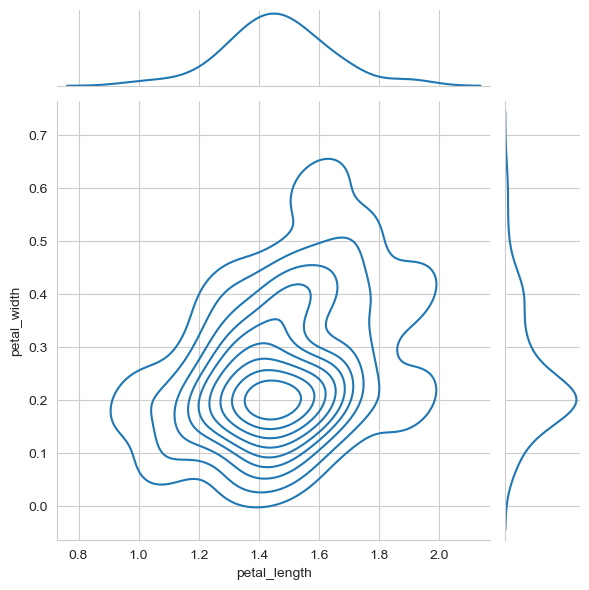

In [24]:
#2D Density plot, contors-plot
import seaborn as sns
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();


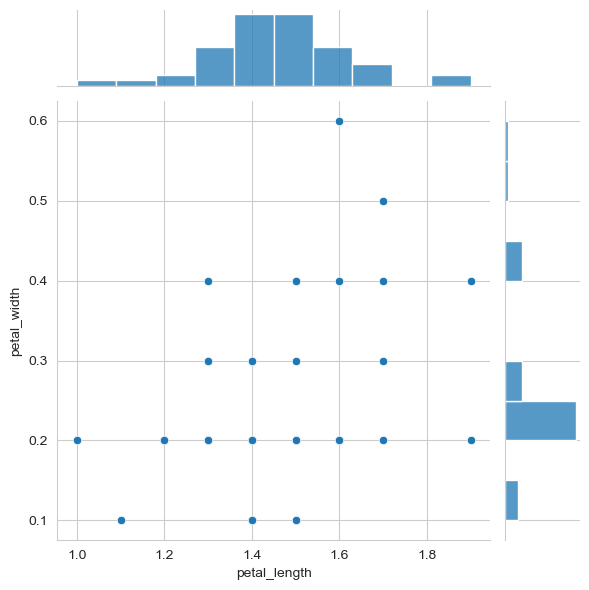

In [25]:
import seaborn as sns
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa);
plt.show();